In [2]:
import pandas as pd

In [8]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    0.513171
0    0.486829
Name: target, dtype: float64


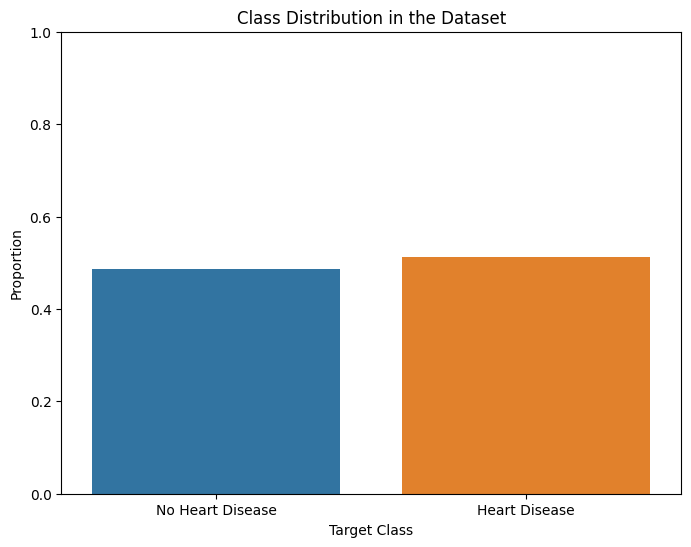

Class Counts:
1    526
0    499
Name: target, dtype: int64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('heart.csv')

# Counting the occurrences of each target class
class_counts = data['target'].value_counts()

# Calculateing class proportions
class_proportions = class_counts / class_counts.sum()
print(class_proportions)
# Create a bar plot to show class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_proportions.index, y=class_proportions.values)
plt.xlabel("Target Class")
plt.ylabel("Proportion")
plt.title("Class Distribution in the Dataset")
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1
plt.show()

# Display class counts
print("Class Counts:")
print(class_counts)


In [9]:
print("male- ",df[df['sex']==1].value_counts().sum())
print("females- ",df[df['sex']==0].value_counts().sum())

male-  713
females-  312


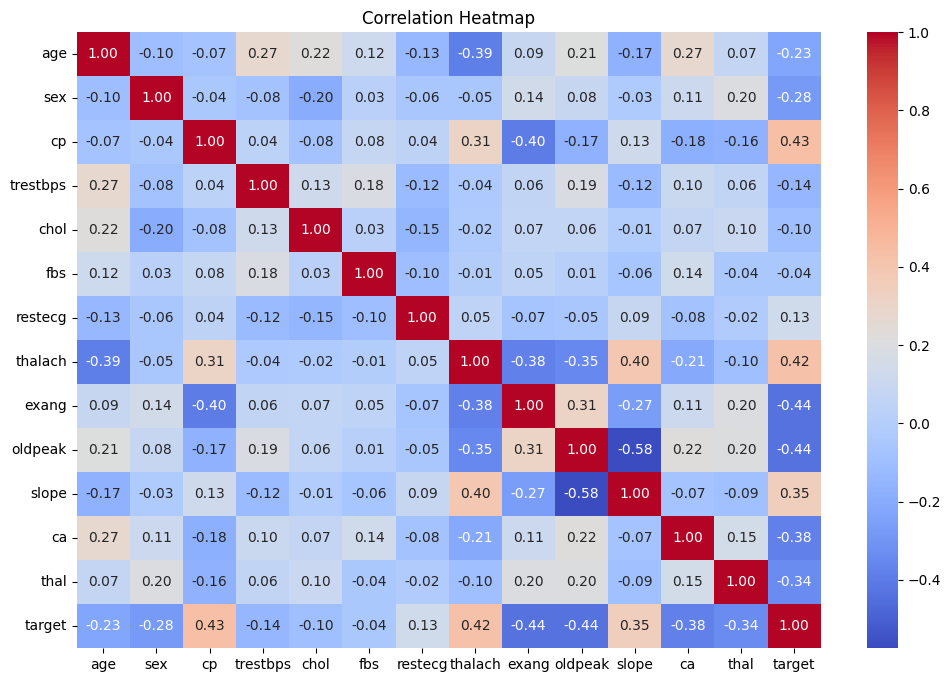

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#value close to  1 or -1 = high corr
#value close to  0 = low corr


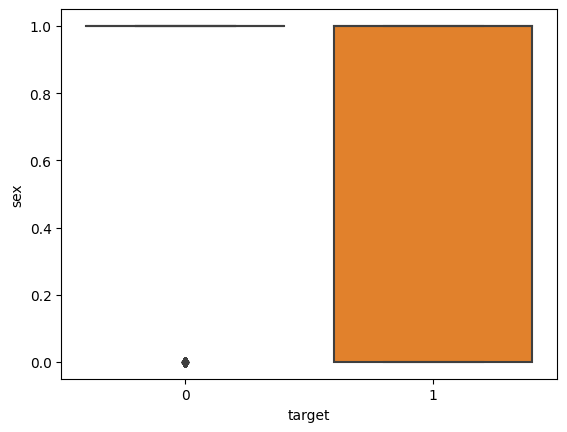

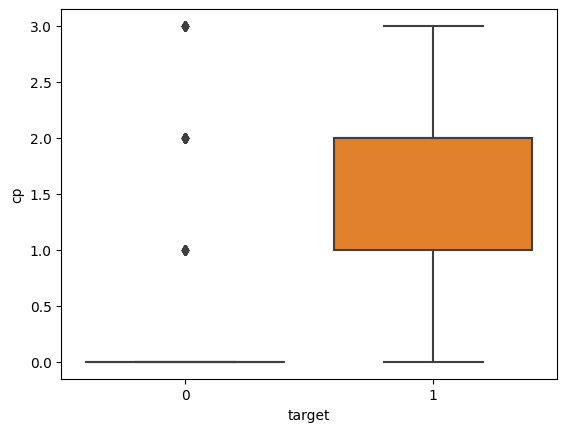

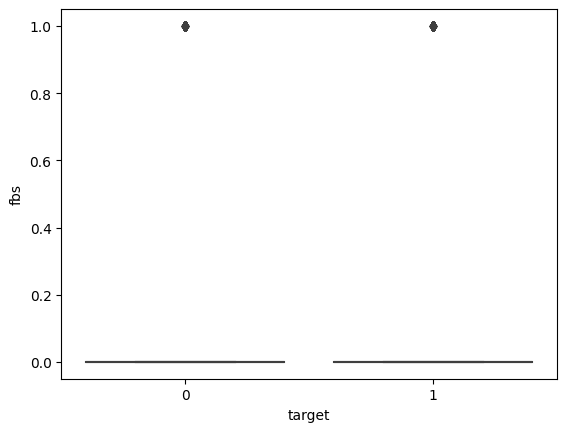

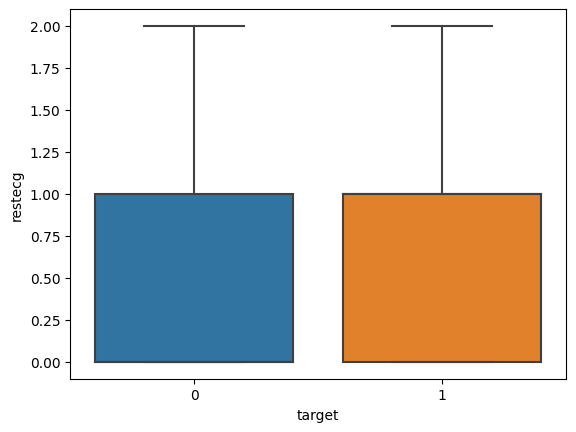

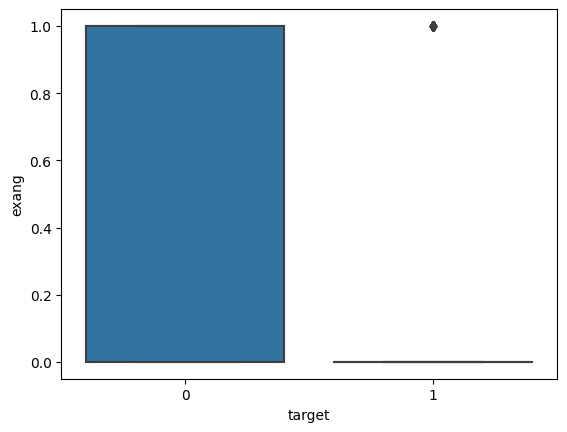

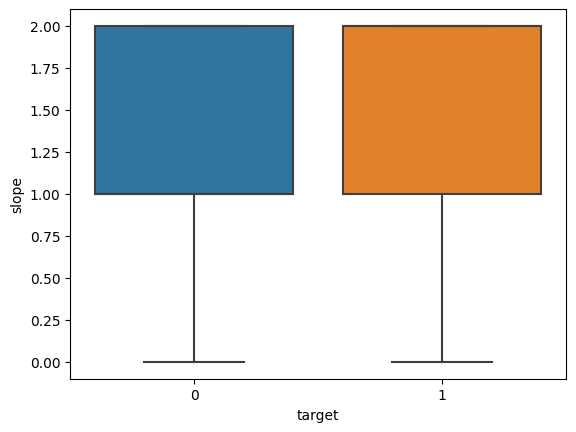

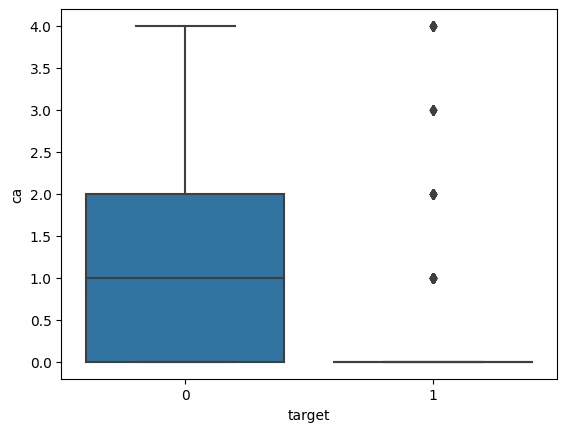

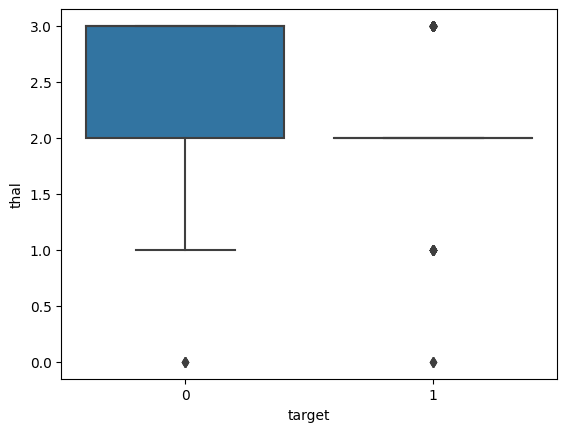

In [18]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
for feature in categorical_features:
    sns.boxplot(x="target", y=feature, data=df)
    plt.show()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Load the heart disease dataset (replace 'heart_disease_data.csv' with your dataset file)
data = pd.read_csv('heart.csv')

# Split data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create different classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVC": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in classifiers.items():
    print(f"Classifier: {name}")

    # Train the model and make predictions
    model.fit(X_train_scaled, y_train)
    y_pred_before = model.predict(X_test_scaled)

    # Calculate accuracy, recall, and confusion matrix before feature selection
    accuracy_before = accuracy_score(y_test, y_pred_before)
    recall_before = recall_score(y_test, y_pred_before)
    confusion_before = confusion_matrix(y_test, y_pred_before)
    print(f"Accuracy before feature selection: {accuracy_before:.2f}")
    print(f"Recall before feature selection: {recall_before:.2f}")
    print("Confusion Matrix before feature selection:")
    print(confusion_before)

    # Apply feature selection using ANOVA F-test
    selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    # Train the model on the selected features and make predictions
    model.fit(X_train_selected, y_train)
    y_pred_after = model.predict(X_test_selected)

    # Calculate accuracy, recall, and confusion matrix after feature selection
    accuracy_after = accuracy_score(y_test, y_pred_after)
    recall_after = recall_score(y_test, y_pred_after)
    confusion_after = confusion_matrix(y_test, y_pred_after)
    print(f"Accuracy after feature selection: {accuracy_after:.2f}")
    print(f"Recall after feature selection: {recall_after:.2f}")
    print("Confusion Matrix after feature selection:")
    print(confusion_after)

    print("=" * 30)
    print()

    # Get the indices of selected features
    selected_indices = selector.get_support(indices=True)

    # Print selected feature names
    selected_feature_names = X.columns[selected_indices]
    print("Selected Features:", selected_feature_names)


Classifier: Logistic Regression
Accuracy before feature selection: 0.80
Recall before feature selection: 0.87
Confusion Matrix before feature selection:
[[73 29]
 [13 90]]
Accuracy after feature selection: 0.81
Recall after feature selection: 0.88
Confusion Matrix after feature selection:
[[75 27]
 [12 91]]

Selected Features: Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')
Classifier: SVC
Accuracy before feature selection: 0.89
Recall before feature selection: 0.94
Confusion Matrix before feature selection:
[[85 17]
 [ 6 97]]
Accuracy after feature selection: 0.87
Recall after feature selection: 0.92
Confusion Matrix after feature selection:
[[84 18]
 [ 8 95]]

Selected Features: Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')
Classifier: K-Nearest Neighbors
Accuracy before feature selection: 0.83
Recall before feature selection: 0.89
Co

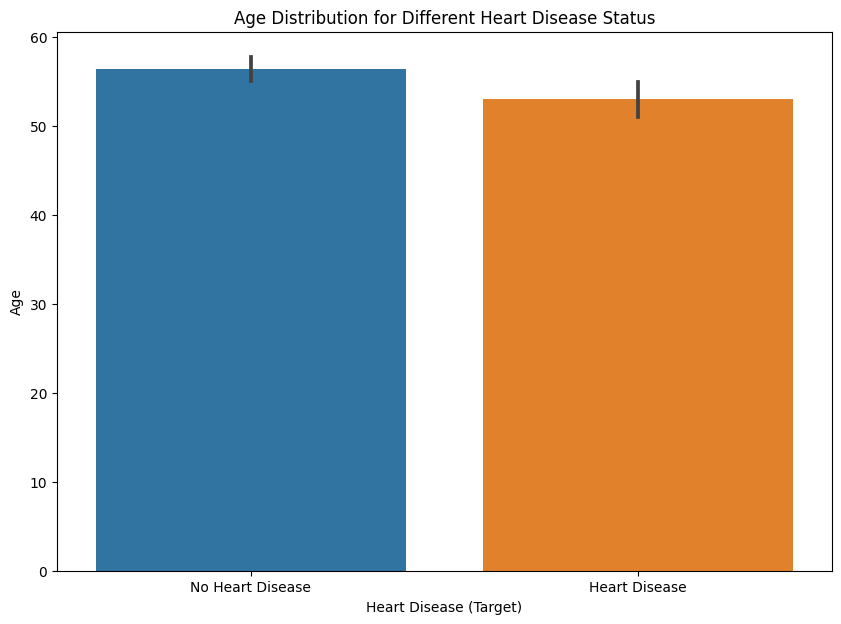

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.barplot(x=y_test, y=X_test['age'])
plt.xlabel("Heart Disease (Target)")
plt.ylabel("Age")
plt.title("Age Distribution for Different Heart Disease Status")
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()